In [1]:
# Install yfinance.
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import dependencies.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Setting the start date
today = datetime.now()
start_date = datetime(today.year-1 ,today.month ,today.day)
print(start_date)

2022-01-28 00:00:00


In [4]:
# Tickers for the companies used for data analysis
ticker_dist = {"Google": "GOOGL",
              "Microsoft":"MSFT",
              "Tesla":"TSLA",
              "Amazon":"AMZN",
              "Netflix":"NFLX",
              "Apple":"AAPL",
              "Facebook":"META"}


In [5]:
# Converting the data to csv.
for ticker in ticker_dist:
    filepath = ticker +".csv"
    globals()[ticker] = yf.download(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker].to_csv(filepath)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Reading the data from csv.
for ticker in ticker_dist:
    filepath = ticker +".csv"
    globals()[ticker] = pd.read_csv(filepath, index_col=0)
    ticker = globals()[ticker]
    

In [7]:
# all ticker name list for labels graph comparision.
labels=[]
for ticker in ticker_dist:
    labels.append(ticker)


In [8]:
# Displaying the labels.
labels

['Google', 'Microsoft', 'Tesla', 'Amazon', 'Netflix', 'Apple', 'Facebook']

In [9]:
# The ticker list for 7 companies.
ticker_list = ["GOOGL","MSFT","TSLA","META","AAPL","AMZN","NFLX"]

In [10]:
# Loading the data by grouping it by 'ticker'.
df = yf.download(ticker_list, start=start_date, end=today,group_by="ticker") 

[*********************100%***********************]  7 of 7 completed


In [11]:
# Converting the data to csv file.
filepath= "merged_df.csv"
df.to_csv(filepath)

In [12]:
# Display the dataframe.
df.head()

GOOGL                                      \
                                 Open        High         Low       Close   
Date                                                                        
2022-01-28 00:00:00-05:00  129.658997  133.356506  128.485001  133.350998   
2022-01-31 00:00:00-05:00  134.162003  135.473007  132.209503  135.303497   
2022-02-01 00:00:00-05:00  137.594498  137.792999  134.368500  137.643997   
2022-02-02 00:00:00-05:00  151.250000  151.546494  145.522507  148.000000   
2022-02-03 00:00:00-05:00  145.705505  149.675003  142.665497  143.089996   

                                                        NFLX              \
                            Adj Close     Volume        Open        High   
Date                                                                       
2022-01-28 00:00:00-05:00  133.350998   34362000  386.760010  387.000000   
2022-01-31 00:00:00-05:00  135.303497   39986000  401.970001  427.700012   
2022-02-01 00:00:00-05:00  137.643997   68644000  432.959991  458.480011   
2022-02-02 00:00:00-05:00  148.000000  123200000  448.250000  451.980011   
2022-02-03 00:00:00-05:00  143.089996   71518000  421.440002  429.260010   

                                                   ...        META  \
                                  Low       Close  ...         Low   
Date                                               ...               
2022-01-28 00:00:00-05:00  372.079987  384.359985  ...  293.029999   
2022-01-31 00:00:00-05:00  398.200012  427.140015  ...  299.320007   
2022-02-01 00:00:00-05:00  425.540009  457.130005  ...  312.119995   
2022-02-02 00:00:00-05:00  426.480011  429.480011  ...  316.869995   
2022-02-03 00:00:00-05:00  404.279999  405.600006  ...  235.750000   

                                                                    MSFT  \
                                Close   Adj Close     Volume        Open   
Date                                                                       
2022-01-28 00:00:00-05:00  301.709991  301.709991   21871600  300.230011   
2022-01-31 00:00:00-05:00  313.260010  313.260010   21579500  308.950012   
2022-02-01 00:00:00-05:00  319.000000  319.000000   18023800  310.410004   
2022-02-02 00:00:00-05:00  323.000000  323.000000   58458300  309.630005   
2022-02-03 00:00:00-05:00  237.759995  237.759995  188119900  309.489990   

                                                                           \
                                 High         Low       Close   Adj Close   
Date                                                                        
2022-01-28 00:00:00-05:00  308.480011  294.450012  308.260010  305.398376   
2022-01-31 00:00:00-05:00  312.380005  306.369995  310.980011  308.093109   
2022-02-01 00:00:00-05:00  310.630005  305.130005  308.760010  305.893738   
2022-02-02 00:00:00-05:00  315.119995  308.880005  313.459991  310.550079   
2022-02-03 00:00:00-05:00  311.230011  299.959991  301.250000  298.453430   

                                     
                             Volume  
Date                                 
2022-01-28 00:00:00-05:00  49743700  
2022-01-31 00:00:00-05:00  46444500  
2022-02-01 00:00:00-05:00  40950400  
2022-02-02 00:00:00-05:00  36636000  
2022-02-03 00:00:00-05:00  43730000  

[5 rows x 42 columns]

In [13]:
# Displaying information for merged_df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-28 00:00:00-05:00 to 2023-01-27 00:00:00-05:00
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (GOOGL, Open)       251 non-null    float64
 1   (GOOGL, High)       251 non-null    float64
 2   (GOOGL, Low)        251 non-null    float64
 3   (GOOGL, Close)      251 non-null    float64
 4   (GOOGL, Adj Close)  251 non-null    float64
 5   (GOOGL, Volume)     251 non-null    int64  
 6   (NFLX, Open)        251 non-null    float64
 7   (NFLX, High)        251 non-null    float64
 8   (NFLX, Low)         251 non-null    float64
 9   (NFLX, Close)       251 non-null    float64
 10  (NFLX, Adj Close)   251 non-null    float64
 11  (NFLX, Volume)      251 non-null    int64  
 12  (AAPL, Open)        251 non-null    float64
 13  (AAPL, High)        251 non-null    float64
 14  (AAPL, Low)         251 non-null    float64
 15  (AAPL, C

In [14]:
# Loading the data from csv files.
google_df = pd.read_csv("Google.csv")
Amazon_df = pd.read_csv("Amazon.csv")
Facebook_df = pd.read_csv("Facebook.csv")
Apple_df = pd.read_csv("Apple.csv")
Microsoft_df = pd.read_csv("Microsoft.csv")
Netflix_df = pd.read_csv("Netflix.csv")
Tesla_df = pd.read_csv("Tesla.csv")

In [15]:
# Checking the information for google_df
Facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [16]:
# Converting the date column to date type.
Facebook_df['Date'] = pd.to_datetime(Facebook_df['Date'], utc=True)


In [17]:
# Checking data types to confirm the change.
Facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       251 non-null    datetime64[ns, UTC]
 1   Open       251 non-null    float64            
 2   High       251 non-null    float64            
 3   Low        251 non-null    float64            
 4   Close      251 non-null    float64            
 5   Adj Close  251 non-null    float64            
 6   Volume     251 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 13.9 KB


In [18]:
Facebook_df = Facebook_df.set_index('Date')
Facebook_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-28 05:00:00+00:00,295.619995,301.899994,293.029999,301.709991,301.709991,21871600
2022-01-31 05:00:00+00:00,300.679993,313.790009,299.320007,313.260010,313.260010,21579500
2022-02-01 05:00:00+00:00,314.559998,319.660004,312.119995,319.000000,319.000000,18023800
2022-02-02 05:00:00+00:00,327.820007,328.000000,316.869995,323.000000,323.000000,58458300
2022-02-03 05:00:00+00:00,244.649994,248.000000,235.750000,237.759995,237.759995,188119900


In [19]:
Facebook_df['High_Low_per'] = (Facebook_df['High'] - Facebook_df['Low']) / Facebook_df['Low']*100


In [20]:
Facebook_df['Per_change'] = (Facebook_df['Open'] - Facebook_df['Close']) / Facebook_df['Close']*100

In [21]:
Facebook_df = Facebook_df[['Adj Close','High_Low_per','Per_change','Volume']]

In [22]:
import math

In [23]:
forecast_ceil = int(math.ceil(0.001*len(Facebook_df)))

In [24]:
label_col = 'Adj Close'

In [25]:
Facebook_df['label'] = Facebook_df[label_col].shift(-forecast_ceil)

In [26]:
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as preprocessing

import matplotlib.pyplot as plt
from matplotlib import style

In [27]:
#feaures X, labels Y
X = np.array(Facebook_df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

In [28]:
Facebook_df.dropna(inplace=True)

In [29]:
y = np.array(Facebook_df['label'])

In [30]:
len(X)

250

In [31]:
len(y)

250

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [44]:
clf = SVR(kernel='rbf')

In [45]:
clf.fit(X_train, y_train) #train

SVR()

In [46]:
accuracy = clf.score(X_test, y_test) #test Accuracy 


In [47]:
 
print(accuracy) #directionally accurate

0.34601482471070877


In [48]:
forecast_set = clf.predict(X_lately) #pass a single value or array

In [49]:
print(forecast_set, accuracy) # stockprices next 30 days

[152.28661795] 0.34601482471070877


In [50]:
Facebook_df['Forecast'] = np.nan

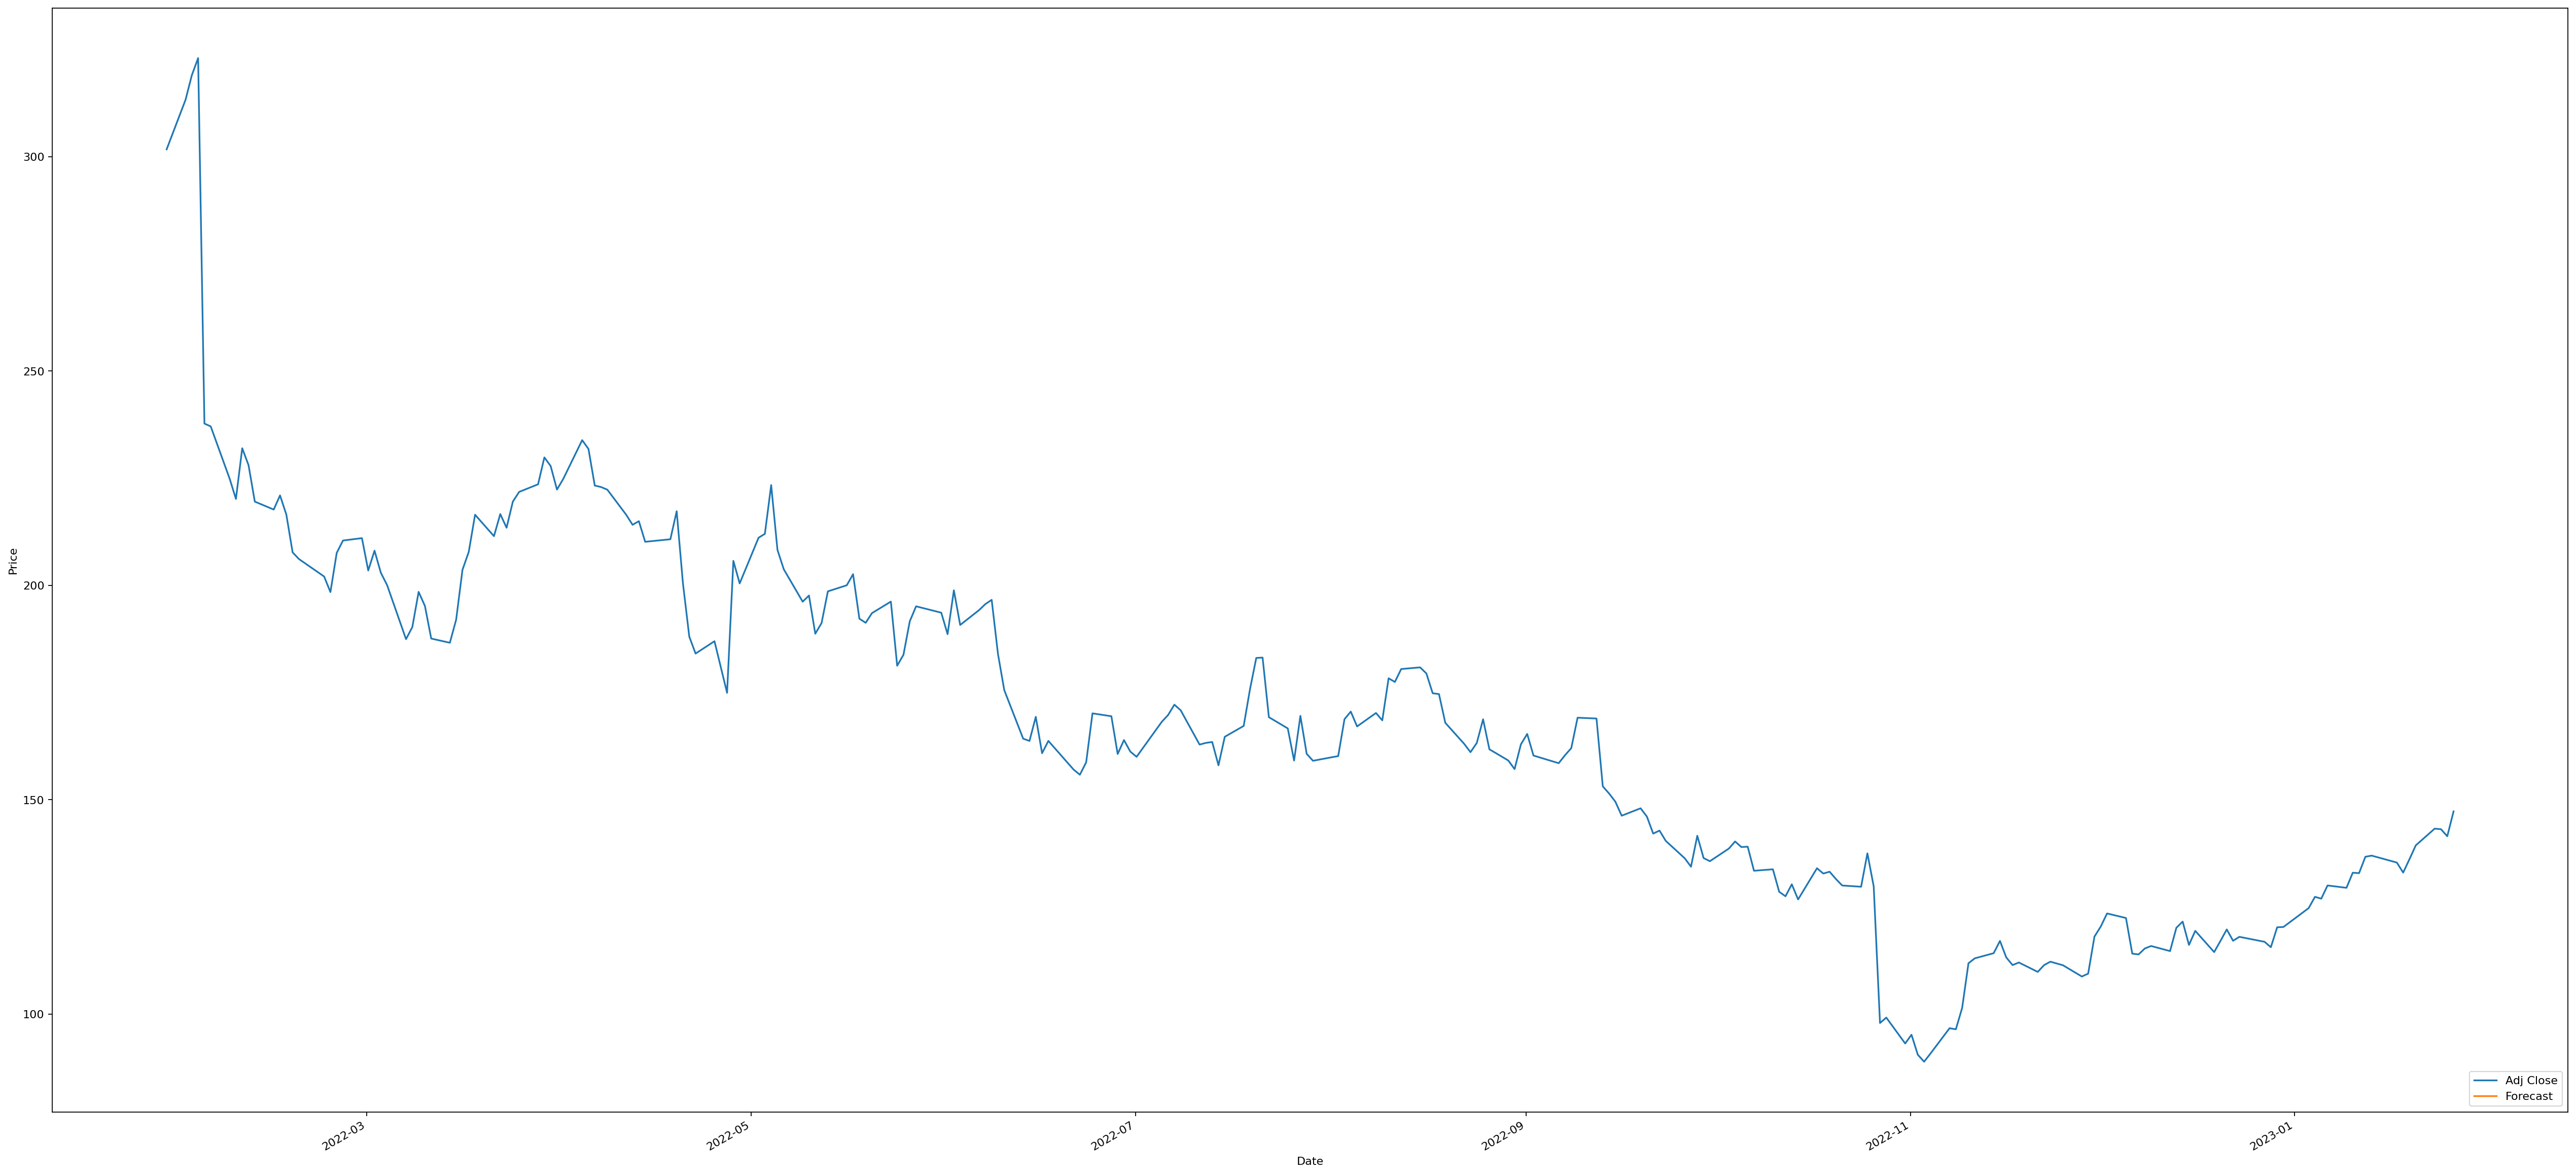

In [51]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
Facebook_df['Adj Close'].plot()
Facebook_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()